In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [157]:
# data from imu
acc_x = []
acc_y = []
acc_z = []
segs = []
with open('../src/lecturas_imu.log', 'r') as f:
    
    start = 18
    end = 20
    current = 0
    
    for line in f:
        if "---" in line:
            # print (line)
            current = 0
            continue
        
        if current >= start and current <= end:
            if current == 18:
                acc_x.append(float(line.split(':')[1][1:-1]))
            elif current == 19:
                acc_y.append(float(line.split(':')[1][1:-1]))
            else:
                acc_z.append(float(line.split(':')[1][1:-1]))
            # print (line)
        elif current == 3:
            segs.append(int(line.split(':')[1][1:-1]))
        
        current += 1

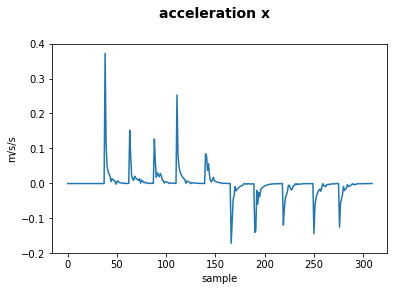

In [188]:
fig = plt.figure()
fig.suptitle('acceleration x', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
# ax.set_title('axes title')

ax.set_xlabel('sample')
ax.set_ylabel('m/s/s')

ax.plot(acc_x)

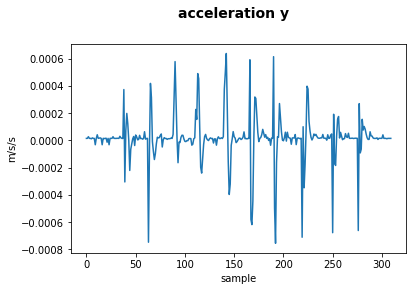

In [189]:
fig = plt.figure()
fig.suptitle('acceleration y', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
# ax.set_title('axes title')

ax.set_xlabel('sample')
ax.set_ylabel('m/s/s')

ax.plot(acc_y)

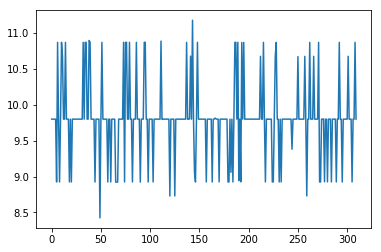

In [136]:
plt.plot(acc_z)

In [131]:
# test with moving average 
ma_x = []
for i in range(20, len(acc_x)):
    ma_x.append(sum(acc_x[i-15:i])/20)
    
ma_y = []
for i in range(20, len(acc_y)):
    ma_y.append(sum(acc_y[i-15:i])/20)

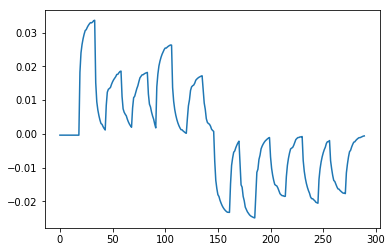

In [133]:
plt.plot(ma_x)

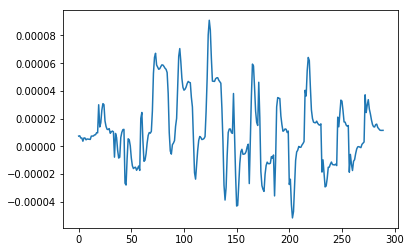

In [135]:
plt.plot(ma_y)

In [176]:
vel_x = [0]
pos_x = [0]
T = 1 / 10 # segs
for i in range(1, len(acc_x)):
    #first integration
    vel_x.append(vel_x[i - 1] + ( acc_x[i] + (acc_x[i] - acc_x[i - 1]) / 2 ) * T)
    #second integration
    pos_x.append(pos_x[i - 1] + ( vel_x[i] + (vel_x[i] - vel_x[i - 1]) / 2 ) * T) 

In [177]:
vel_y = [0]
pos_y = [0]
T = 1 / 10
for i in range(1, len(acc_y)):
    # first integration
    vel_y.append(vel_y[i - 1] + ( acc_y[i] + (acc_y[i] - acc_y[i - 1]) / 2 ) * T)
    # second integration
    pos_y.append(pos_y[i - 1] + ( vel_y[i] + (vel_y[i] - vel_y[i - 1]) / 2 ) * T)

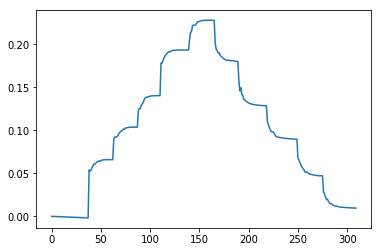

In [178]:
plt.plot(vel_x)

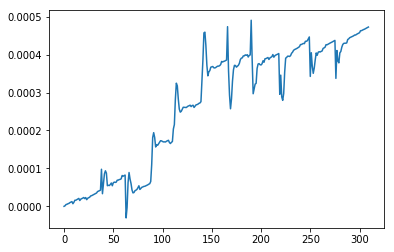

In [179]:
plt.plot(vel_y)

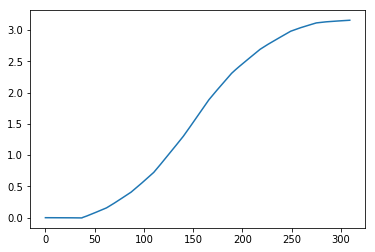

In [180]:
plt.plot(pos_x)

In [181]:
# data from real_pose
pos_x_real = []
pos_y_real = []
# theta theta = [] #por ahora no 
with open('../src/lecturas_pose.log', 'r') as f:
    
    start = 0
    end = 1
    current = 0
    
    for line in f:
        if "---" in line:
            # print (line)
            current = 0
            continue
        
        if current >= start and current <= end:
            if current == 0:
                pos_x_real.append(float(line.split(':')[1][1:-1]))
            elif current == 1:
                pos_y_real.append(float(line.split(':')[1][1:-1]))
            
            # print (line)
        
        current += 1

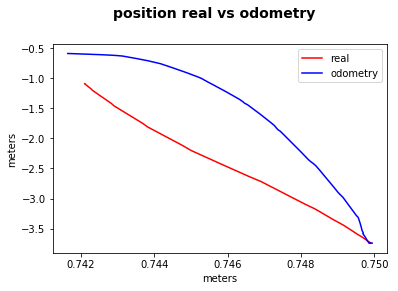

In [190]:
# odometria
x_odom = [ 0.749941 + -i for i in pos_y ]
y_odom = [ -3.7422 + i for i in pos_x ]

# color = [1] * len(pos_x_real)
# color += [2] * len(pos_x)

# x_completa = pos_x_real + x_odom
# y_completa = pos_y_real + y_odom

# plt.plot(x_completa, y_completa, color)

fig = plt.figure()
fig.suptitle('position real vs odometry', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
# ax.set_title('axes title')

ax.set_xlabel('meters')
ax.set_ylabel('meters')

ax.plot(pos_x_real, pos_y_real, color='red', label='real')
ax.plot(x_odom, y_odom, color='blue', label='odometry')

plt.legend()